<div style="background-color: #7b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 40px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">SPORTS PROJECT STORY
</h1>
</div>

<div style="background-color: #3b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 20px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">TECH TITANS
</h1>
</div>

In [43]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from scipy.stats.mstats import winsorize 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.decomposition import PCA  # Import PCA correctly

In [44]:
df=pd.read_csv("cleaned_sports_dataset.csv")

# PROBLEM STATEMENT 4

# PASS COMPLETION RATES vs ASSISTS

Understanding Pass Completion Rate: This is the percentage of successful passes a player makes. It's a fundamental measure of a player's passing accuracy and effectiveness in moving the ball forward.

Understanding Assists: An assist is a pass that directly leads to a teammate scoring a goal.

The Connection between Pass completion rate and assists: 

While a high pass completion rate is important, it doesn't directly equate to assists. A player could complete many passes but not be involved in creating scoring opportunities. However, a player with a high pass completion rate is more likely to have the accuracy and vision to create assists.

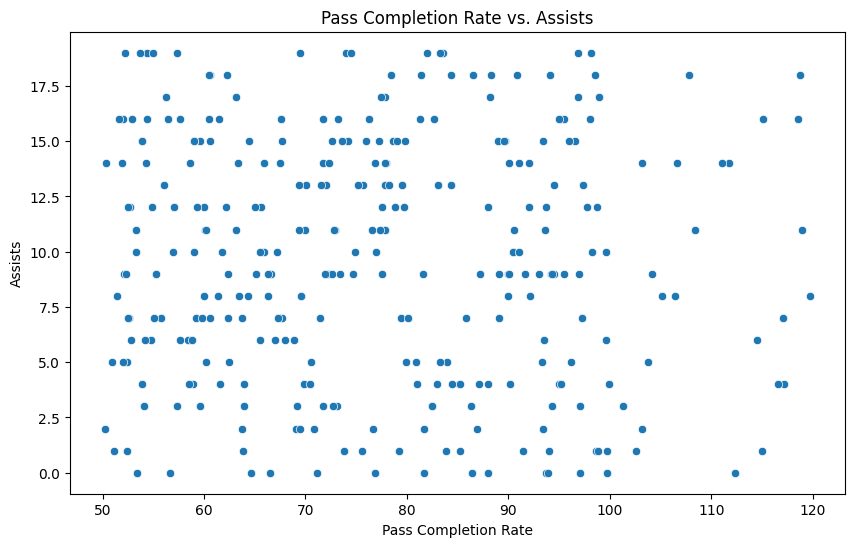

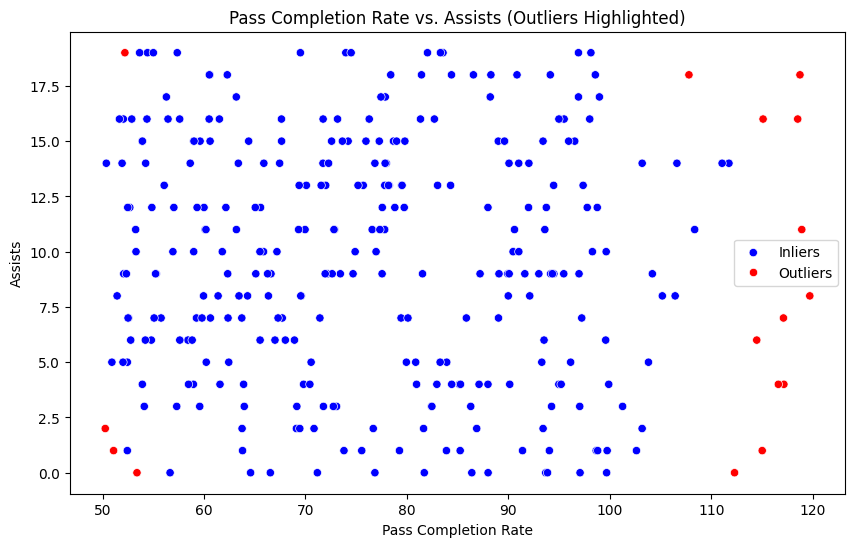

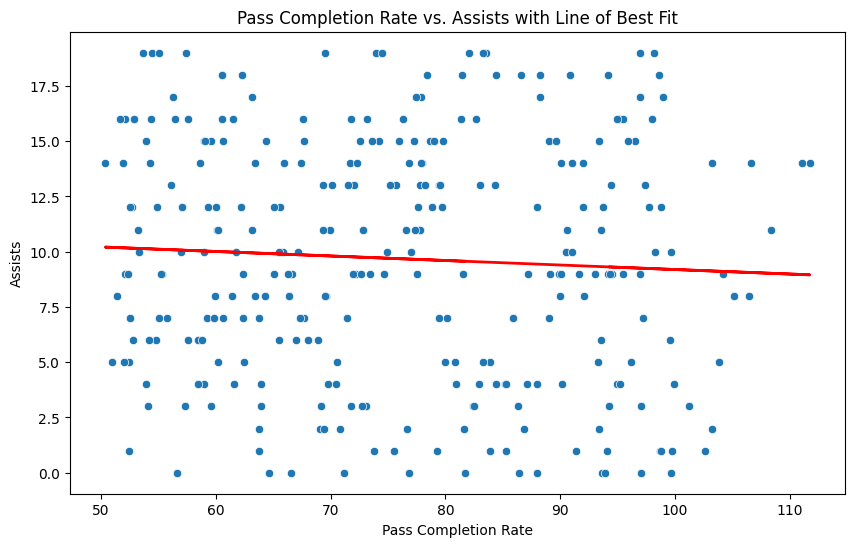

R-squared: 0.003435979003980294


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the dataset
df=pd.read_csv("cleaned_sports_dataset.csv")
df= pd.read_csv(file_path)
df=df.head(500)
# Filter necessary columns and drop missing values
data= df[['PassCompletionRate', 'Assists']].dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=data)
plt.title('Pass Completion Rate vs. Assists')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()

# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(data)

# Mark the outliers
data['Outlier'] = outliers

# Scatter plot with outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', hue='Outlier', data=data, palette={1: 'blue', -1: 'red'})
plt.title('Pass Completion Rate vs. Assists (Outliers Highlighted)')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.legend(['Inliers', 'Outliers'])
plt.show()

# Remove outliers from the data
cleaned_data = data[data['Outlier'] == 1]

# Regression analysis
X = cleaned_data[['PassCompletionRate']]
y = cleaned_data['Assists']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions for plotting the line of best fit
y_pred = model.predict(X)

# Scatter plot with line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=cleaned_data)
plt.plot(cleaned_data['PassCompletionRate'], y_pred, color='red', linewidth=2)
plt.title('Pass Completion Rate vs. Assists with Line of Best Fit')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()

# Model evaluation
r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')